In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model


import os,cv2
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [3]:
import pickle 
with open('data.pkl','rb') as f:
      X = pickle.load(f)

In [4]:
# labels - age, gender, ethnicity
BASE_DIR = 'UTKFace/'
image_paths = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    gender = int(temp[1])
    image_paths.append(image_path)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
gender_labels=np.array(gender_labels)
y= gender_labels.astype(np.float32)


In [6]:
np.unique(y)

array([0., 1.], dtype=float32)

In [6]:


# Define the input shape
input_shape = (128, 128, 1)

inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)



# Create the model
model = Model(inputs=inputs, outputs=output_1)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856 

In [7]:
y

array([0., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [9]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# training process will be stopped if the monitored quantity does not improve for 10 consecutive epochs.
# x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(X, y, random_state=42)



In [11]:
# x_train_age = np.asarray(x_train_age).astype('float32').reshape((-1,1))
# x_test_age= np.asarray(x_test_age).astype('float32').reshape((-1,1))

In [12]:
model.fit(x=X,y=y ,callbacks=[early_stopping], batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/10
190/190 [==============================] - 291s 2s/step - loss: 0.4492 - accuracy: 0.7807 - val_loss: 0.4438 - val_accuracy: 0.7895
Epoch 2/10
190/190 [==============================] - 279s 1s/step - loss: 0.2813 - accuracy: 0.8786 - val_loss: 0.4241 - val_accuracy: 0.7942
Epoch 3/10
190/190 [==============================] - 283s 1s/step - loss: 0.2475 - accuracy: 0.8924 - val_loss: 0.3804 - val_accuracy: 0.8317
Epoch 4/10
190/190 [==============================] - 279s 1s/step - loss: 0.2261 - accuracy: 0.9043 - val_loss: 0.3846 - val_accuracy: 0.8353
Epoch 5/10
190/190 [==============================] - 275s 1s/step - loss: 0.2035 - accuracy: 0.9141 - val_loss: 0.4003 - val_accuracy: 0.8408
Epoch 6/10
190/190 [==============================] - 272s 1s/step - loss: 0.1867 - accuracy: 0.9227 - val_loss: 0.3794 - val_accuracy: 0.8334
Epoch 7/10
190/190 [==============================] - 273s 1s/step - loss: 0.1750 - accuracy: 0.9241 - val_loss: 0.3837 - val_accuracy: 0.8515

1/1 [==============================] - 0s 452ms/step


'Female'

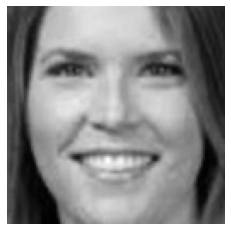

In [9]:
# image = cv2.imread()
# image = Image.fromarray(image, 'RGB')
# image = image.resize((64, 64))
# image=np.array(image)

img = tf.keras.utils.load_img("UTKFace/27_1_0_20170109002819172.jpg.chip.jpg", grayscale=True)
gender_dict = {0:'Male', 1:'Female'}

# image = cv2.imread("UTKFace\9_1_0_20170105000600802.jpg.chip.jpg")
img = img.resize((128,128), Image.ANTIALIAS)
img = np.array(img)
input_shape = (128, 128, 1)
pred=model.predict(img.reshape(1, 128, 128, 1))
pred_gender = gender_dict[int(pred[0][0])]
# print("Predicted Gender:", pred_gender, "\nPredicted Age:", pred_age)
plt.axis('off')
plt.imshow(img.reshape(128, 128), cmap='gray');

pred_gender 

In [35]:
 model.save('Gendermodel.h5')


In [8]:
model=load_model("Gendermodel.h5")